In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
df = pd.read_csv('/content/coldplay.csv', delimiter=';')
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Wed Nov 15 23:55:36 +0000 2023,1724939236477112571,Perth in grip of C0VID wave &amp superspreade...,5,10,73,205,en,46042676,1724939236477112571,amnewtonPhD,https://twitter.com/amnewtonPhD/status/1724939...
1,Wed Nov 15 23:51:39 +0000 2023,1724938244201345156,reading all the tweets abt how chaos coldplay ...,0,0,0,0,en,835442323,1724938244201345156,uniserendipity,https://twitter.com/uniserendipity/status/1724...
2,Wed Nov 15 23:50:07 +0000 2023,1724937855607390482,@chairmanGLC Malaysia: kita benci lgbt movemen...,1,3,0,9,en,770943602629369856,1724799207700406667,Boobies888,https://twitter.com/Boobies888/status/17249378...
3,Wed Nov 15 23:44:14 +0000 2023,1724936375882174671,I still can't figure it out why I don't have t...,1,1,0,1,en,513041996,1724936375882174671,sj_besar,https://twitter.com/sj_besar/status/1724936375...
4,Wed Nov 15 23:41:37 +0000 2023,1724935719389651437,coldplay concert tix cutie,0,0,0,0,en,1120642022811901957,1724935719389651437,uniqloe_,https://twitter.com/uniqloe_/status/1724935719...


1. Data Understanding

In [11]:
df.dtypes

created_at             object
id_str                  int64
full_text              object
quote_count             int64
reply_count             int64
retweet_count           int64
favorite_count          int64
lang                   object
user_id_str             int64
conversation_id_str     int64
username               object
tweet_url              object
dtype: object

In [12]:
df.shape

(595, 12)

In [13]:
df.isnull().sum()

created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64

In [14]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
590    False
591    False
592    False
593    False
594    False
Length: 595, dtype: bool

In [15]:
df.describe()

,id_str,quote_count,reply_count,retweet_count,favorite_count,user_id_str,conversation_id_str
count,5.950000e+02,595.000000,595.000000,595.000000,595.000000,5.950000e+02,5.950000e+02
mean,1.724686e+18,0.968067,1.739496,5.781513,20.499160,7.838963e+17,1.724576e+18
std,1.886690e+14,13.147851,10.434389,76.808012,240.457108,6.946125e+17,2.194141e+15
min,1.724221e+18,0.000000,0.000000,0.000000,0.000000,7.587032e+06,1.671450e+18
25%,1.724566e+18,0.000000,0.000000,0.000000,0.000000,3.907504e+08,1.724526e+18
50%,1.724748e+18,0.000000,0.000000,0.000000,0.000000,9.803861e+17,1.724741e+18
75%,1.724832e+18,0.000000,1.000000,0.000000,2.000000,1.431774e+18,1.724827e+18
max,1.724939e+18,300.000000,198.000000,1823.000000,5594.000000,1.723576e+18,1.724939e+18


2. Data Prepocessing

In [16]:
droped_columns = ['tweet_url', 'username','created_at','quote_count', 'lang','reply_count', 'retweet_count','favorite_count','user_id_str','conversation_id_str','id_str']
df = df.drop(columns=droped_columns)
df.head()

,full_text
0,Perth in grip of C0VID wave &amp superspreade...
1,reading all the tweets abt how chaos coldplay ...
2,@chairmanGLC Malaysia: kita benci lgbt movemen...
3,I still can't figure it out why I don't have t...
4,coldplay concert tix cutie


In [17]:
df['full_text'] = df['full_text'].str.lower()
df.head()

,full_text
0,perth in grip of c0vid wave &amp superspreade...
1,reading all the tweets abt how chaos coldplay ...
2,@chairmanglc malaysia: kita benci lgbt movemen...
3,i still can't figure it out why i don't have t...
4,coldplay concert tix cutie


In [19]:
def clean_text(text):
    text = re.sub(r'@[\w_]+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['full_text'] = df['full_text'].apply(clean_text)

df.head()

,full_text
0,perth in grip of cvid wave amp superspreader ...
1,reading all the tweets abt how chaos coldplay ...
2,malaysia kita benci lgbt movement holds cold...
3,i still cant figure it out why i dont have the...
4,coldplay concert tix cutie


3. Data Labeling

In [32]:
df['sentimen'] = 'netral'

def analyze_sentiment(text):
    # Create a SentimentIntensityAnalyzer object
    sia = SentimentIntensityAnalyzer()

    # Get the sentiment scores
    sentiment_scores = sia.polarity_scores(text)

    # Classify sentiment based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        sentiment_label = "Positive"
    elif sentiment_scores['compound'] <= -0.05:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    return sentiment_label

df['sentimen'] = df['full_text'].apply(analyze_sentiment)

print(df)

                                             full_text  sentimen     aspect
0    perth in grip of cvid wave amp  superspreader ...   Neutral  no aspect
1    reading all the tweets abt how chaos coldplay ...  Negative  no aspect
2     malaysia kita benci lgbt movement  holds cold...   Neutral  no aspect
3    i still cant figure it out why i dont have the...  Negative  no aspect
4                           coldplay concert tix cutie  Positive  no aspect
..                                                 ...       ...        ...
590  the woman in black is me when i saw her in fro...  Positive  no aspect
591  wts coldplay concert in gbk jakarta music of t...   Neutral  no aspect
592          the coldplay concert bikes are sending me   Neutral  no aspect
593   i want to be able to ride my ebike to a conce...  Positive  no aspect
594    according to global condition especially mas...  Negative  no aspect

[595 rows x 3 columns]


In [48]:
#To categorize tweets into several aspect of concert,
#we make label kategorie so we know what is need to improve in next concert of coldplay

df['aspect'] = 'no aspect'

def label_aspect(row, aspect_keywords):
    """
    Fungsi untuk pelabelan aspek berdasarkan tokenized data.

    Parameters:
    - row (str): Teks yang akan dilabeli.
    - aspect_keywords (list): List kata kunci untuk setiap aspek.

    Returns:
    - label (str): Label aspek berdasarkan kata kunci.
    """
    # Tokenisasi teks menggunakan nltk
    tokens = word_tokenize(row.lower())  # Mengonversi ke huruf kecil untuk kecocokan kasus-insensitive

    # Mengecek keberadaan kata kunci dalam token
    for aspect, keywords in aspect_keywords.items():
        if any(keyword.lower() in tokens for keyword in keywords):
            return aspect

    # Jika tidak ada kata kunci yang cocok, kembalikan 'Uncategorized' atau sesuaikan kebutuhan Anda
    return 'no aspect'

# Contoh penggunaan
aspect_keywords = {
    'ticket': ['ticket', 'cost', 'price', 'value', 'worth', 'money', 'affordable', 'discount', 'offer'],
    'facility': ['location', 'venue', 'access', 'facility', 'quality', 'infrastucture', 'comfort', 'seat', 'hygiene', 'clean'],
    'experience': ['experience', 'moment', 'memories', 'music', 'live', 'show', 'interaction', 'crowd', 'atmosphere', 'audio', 'sound', 'visual', 'lighting', 'stage', 'artis', 'band'],
}

# Gantilah 'your_text_column' dengan nama kolom yang ingin Anda lakukan pelabelan
df['aspect'] = df['full_text'].apply(lambda x: label_aspect(x, aspect_keywords))


In [39]:
countPositive = 0
countNegative = 0
countNeutral = 0
for row in range(0, 595):
    if df['sentimen'][row] == 'Positive' : countPositive = countPositive + 1
    elif df['sentimen'][row] == 'Negative' : countNegative = countNegative + 1
    elif df['sentimen'][row] == 'Neutral' : countNeutral = countNeutral + 1

print('Jumlah countPositive', countPositive)
print('Jumlah countNegative', countNegative)
print('Jumlah countNeutral', countNeutral)

Jumlah countPositive 316
Jumlah countNegative 103
Jumlah countNeutral 176


In [49]:
countTicket = 0
countFacility = 0
countExperience = 0
noAspect = 0

for row in range(0, 595):
    if (df['aspect'][row]) == 'ticket': countTicket = countTicket + 1
    elif (df['aspect'][row]) == 'facility': countFacility = countFacility + 1
    elif (df['aspect'][row]) == 'experience': countExperience = countExperience + 1
    elif (df['aspect'][row]) == 'no aspect': noAspect = noAspect + 1

print("No Aspect", noAspect)
print("Ticket", countTicket)
print("Facility", countFacility)
print("Experience", countExperience)


No Aspect 450
Ticket 70
Facility 8
Experience 67


In [50]:
df.to_csv('result.csv')

4 Visualisasi Data

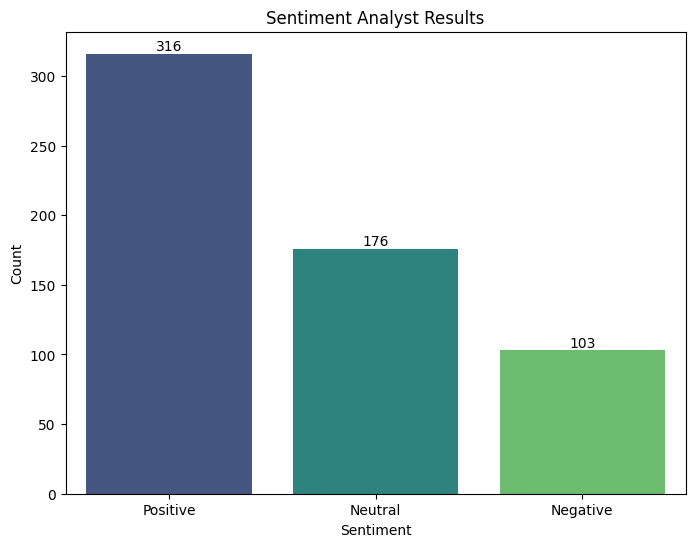

In [51]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(df['sentimen']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Display count values on top of each bar
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Sentiment Analyst Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

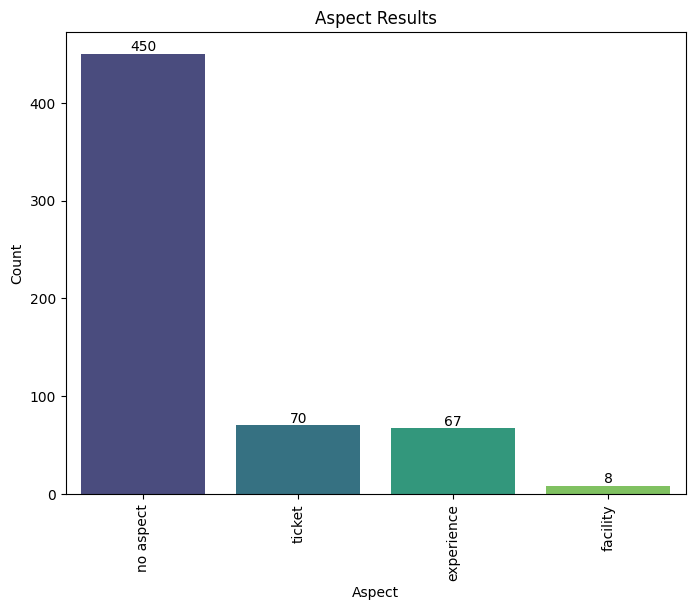

In [52]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(df['aspect']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display count values on top of each bar
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Aspect Results')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.show()